In [1]:
#this one has degrees in it, wack

import pygame
from pygame.locals import *

from OpenGL.GL import *
from OpenGL.GLU import *

#sets vertices on xyz plane
verticies = (
    (1, 0, 0),
    (-1, 0, 0),
    (0, 0, 1),
    (0, 0, -1),
    (0, 1, 0),
    (0, -1, 0)
    )

#determines which vertices should get connected
edges = (
    (0,2),
    (0,5),
    (0,4),
    (0,3),
    (1,5),
    (1,2),
    (1,4),
    (1,3),
    (2,5),
    (2,4),
    (3,5),
    (3,4)
    )

#joe's suggestion: time, append coordinates? g r ap h :
#frame stuf

#actually draws the lines that connect the vertices
def D8():
    glBegin(GL_LINES)
    for edge in edges:
        for vertex in edge:
            glVertex3fv(verticies[vertex])
    glEnd()

#rotating and display process
def main():
    pygame.init()
    display = (800,600)
    pygame.display.set_mode(display, DOUBLEBUF|OPENGL)

    gluPerspective(45, (display[0]/display[1]), 0.1, 50.0)

    glTranslatef(0.0, 0.0, -10)

    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        clock = pygame.time.Clock()
        clock.tick()
        degrees_per_second = 360/3
        degrees_per_millisecond = degrees_per_second / 1000
        glRotatef(clock.tick(60) * degrees_per_millisecond,1,1,1)
        
        #maybe for every frame you can append coordinates to an array and then graph that
        glClear(GL_COLOR_BUFFER_BIT|GL_DEPTH_BUFFER_BIT)
        D8()
        pygame.display.flip()
        pygame.time.wait(10)


main()

pygame 2.0.0.dev6 (SDL 2.0.10, python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


GLError: GLError(
	err = 1282,
	description = b'invalid operation',
	baseOperation = glRotatef,
	cArguments = (1.92, 1, 1, 1)
)

In [1]:
#this one doesn't have a degrees component in the rotation

import pygame
from pygame.locals import *

from OpenGL.GL import *
from OpenGL.GLU import *

verticies = (
    (1, 0, 0),
    (-1, 0, 0),
    (0, 0, 1),
    (0, 0, -1),
    (0, 1, 0),
    (0, -1, 0)
    )

edges = (
    (0,2),
    (0,5),
    (0,4),
    (0,3),
    (1,5),
    (1,2),
    (1,4),
    (1,3),
    (2,5),
    (2,4),
    (3,5),
    (3,4)
    )



#joe's suggestion: time, append coordinates? g r ap h :
#frame stuf

def D8():
    glBegin(GL_LINES)
    for edge in edges:
        for vertex in edge:
            glVertex3fv(verticies[vertex])
    glEnd()


def main():
    pygame.init()
    display = (800,600)
    pygame.display.set_mode(display, DOUBLEBUF|OPENGL)

    gluPerspective(45, (display[0]/display[1]), 0.1, 50.0)

    glTranslatef(0.0, 0.0, -10)

    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

        glRotatef(1,3,1,1)        
        #maybe for every frame you can append coordinates to an array and then graph that
        glClear(GL_COLOR_BUFFER_BIT|GL_DEPTH_BUFFER_BIT)
        D8()
        pygame.display.flip()
        pygame.time.wait(10)


main()

pygame 2.0.0.dev6 (SDL 2.0.10, python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


NameError: name 'gl_Position' is not defined

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations
from mpl_toolkits.mplot3d import Axes3D 

Text(0.5, 0.92, 'Cube')

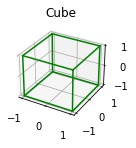

In [2]:
fig = plt.figure()

# draw cube
ax = fig.add_subplot(132, projection='3d')
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
   if np.sum(np.abs(s-e)) == r[1]-r[0]:
      ax.plot3D(*zip(s, e), color="green")
ax.set_title("Cube")


In [5]:
import OpenGL.GL as GL
import OpenGL.GL.shaders
import ctypes
import pygame
import numpy

vertex_shader = """
#version 330
in vec4 position;
void main()
{
   gl_Position = position;
}
"""

fragment_shader = """
#version 330
void main()
{
   gl_FragColor = vec4(1.0f, 1.0f, 1.0f, 1.0f);
}
"""

vertices = [ 0.6,  0.6, 0.0, 1.0,
            -0.6,  0.6, 0.0, 1.0,
             0.0, -0.6, 0.0, 1.0]

vertices = numpy.array(vertices, dtype=numpy.float32)

def create_object(shader):
    # Create a new VAO (Vertex Array Object) and bind it
    vertex_array_object = GL.glGenVertexArrays(1)
    GL.glBindVertexArray( vertex_array_object )
    
    # Generate buffers to hold our vertices
    vertex_buffer = GL.glGenBuffers(1)
    GL.glBindBuffer(GL.GL_ARRAY_BUFFER, vertex_buffer)
    
    # Get the position of the 'position' in parameter of our shader and bind it.
    position = GL.glGetAttribLocation(shader, 'position')
    GL.glEnableVertexAttribArray(position)
    
    # Describe the position data layout in the buffer
    GL.glVertexAttribPointer(position, 4, GL.GL_FLOAT, False, 0, ctypes.c_void_p(0))
    
    # Send the data over to the buffer
    GL.glBufferData(GL.GL_ARRAY_BUFFER, 48, vertices, GL.GL_STATIC_DRAW)
    
    # Unbind the VAO first (Important)
    GL.glBindVertexArray( 0 )
    
    # Unbind other stuff
    GL.glDisableVertexAttribArray(position)
    GL.glBindBuffer(GL.GL_ARRAY_BUFFER, 0)
    
    return vertex_array_object
    
def display(shader, vertex_array_object):
    GL.glClear(GL.GL_COLOR_BUFFER_BIT | GL.GL_DEPTH_BUFFER_BIT)
    GL.glUseProgram(shader)
    
    GL.glBindVertexArray( vertex_array_object )
    GL.glDrawArrays(GL.GL_TRIANGLES, 0, 3)
    GL.glBindVertexArray( 0 )
    
    GL.glUseProgram(0)

def main():
    pygame.init()
    screen = pygame.display.set_mode((512, 512), pygame.OPENGL|pygame.DOUBLEBUF)
    GL.glClearColor(0.5, 0.5, 0.5, 1.0)
    GL.glEnable(GL.GL_DEPTH_TEST)

    shader = OpenGL.GL.shaders.compileProgram(
        OpenGL.GL.shaders.compileShader(vertex_shader, GL.GL_VERTEX_SHADER),
        OpenGL.GL.shaders.compileShader(fragment_shader, GL.GL_FRAGMENT_SHADER)
    )
    
    vertex_array_object = create_object(shader)
    
    clock = pygame.time.Clock()
    
    while True:     
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                return
            if event.type == pygame.KEYUP and event.key == pygame.K_ESCAPE:
                return
        
        display(shader, vertex_array_object)
        pygame.display.flip()

if __name__ == '__main__':
    try:
        main()
    finally:
        pygame.quit()

In [9]:
glBindBuffer(GL_ARRAY_BUFFER, vbo)
uint8_data = glGetBufferSubData(GL_ARRAY_BUFFER, 0, no_of_floats * 4)
float32_data = np.frombuffer(uint8_data, dtype=np.float32)

NameError: name 'glBindBuffer' is not defined